# Data ingestion as a function, EDA investigation use visualizations

In [61]:
import cslib

DATAFRAME
               country  customer_id  day invoice  month  price stream_id  \
0       United Kingdom      13085.0   28  489434     11   6.95     85048   
1       United Kingdom      13085.0   28  489434     11   6.75    79323W   
2       United Kingdom      13085.0   28  489434     11   2.10     22041   
3       United Kingdom      13085.0   28  489434     11   1.25     21232   
4       United Kingdom      13085.0   28  489434     11   1.65     22064   
...                ...          ...  ...     ...    ...    ...       ...   
815006  United Kingdom      16098.0   31  562271      7   3.75     22725   
815007  United Kingdom      16098.0   31  562271      7   3.75     22726   
815008  United Kingdom      16098.0   31  562271      7   3.75     22727   
815009  United Kingdom      14056.0   31  562269      7   2.95     22090   
815010  United Kingdom      15628.0   31  562163      7   1.65     22558   

        times_viewed  year invoice_date  
0                 12  2017   2017-1

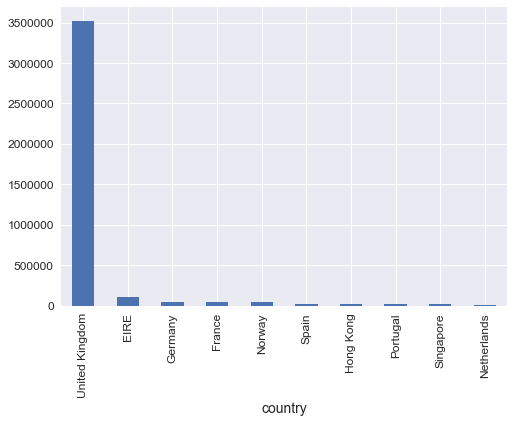

REVENUES IN SPECIFIC YEARS


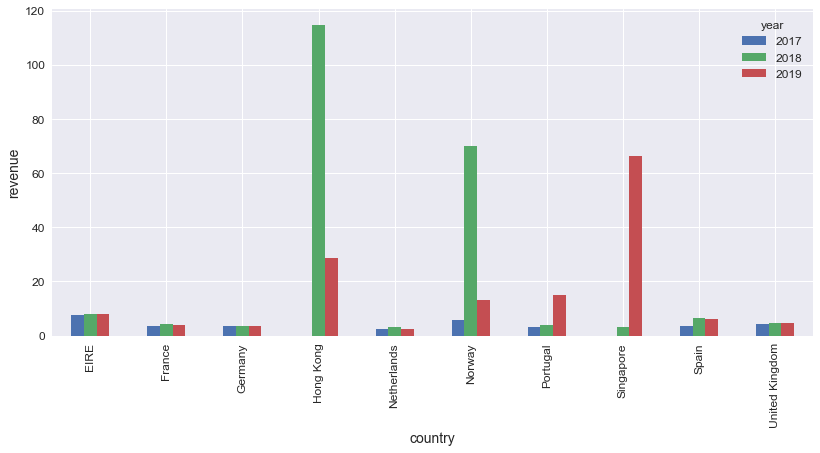

REVENUES IN SPECIFIC MONTHS


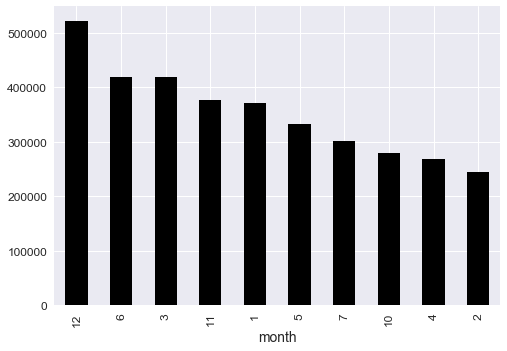

In [64]:
import matplotlib.pyplot as plt

%matplotlib inline
cslib.data_ingestion()

In [65]:
!python cslib.py

...fetching data
... loading ts data from files
load time: 0:00:00
all (607, 7)
eire (607, 7)
france (607, 7)
germany (607, 7)
hong_kong (426, 7)
netherlands (607, 7)
norway (577, 7)
portugal (607, 7)
singapore (456, 7)
spain (607, 7)
united_kingdom (607, 7)


# Unit tests for the logging, isolation of the read/write unit tests from production models and logs

In [66]:
!python ./unittests/LoggerTests.py

....
----------------------------------------------------------------------
Ran 4 tests in 0.018s

OK


# Run the Flask app before API testing, Flask app can make predictions for a specific country or for all countries combined

open new terminal -> go to the directory with app.py file (with command cd) -> start the flask app with writing the command: python app.py
-> go to web browser and write url http://127.0.0.1:8080/ , use the navigation to go to the page "predict". On the web-page you can choose for which country you want to predict revenues. You can choose all countries or specific one. Wait a while for prediction.

# Unit tests for the API

In [1]:
!python ./unittests/ApiTests.py

.
----------------------------------------------------------------------
Ran 1 test in 0.000s

OK


# Unit tests for the model, isolatio of the read/write unit tests from production models and logs

In [67]:
!python ./unittests/ModelTests.py

... test flag on
...... subseting data
...... subseting countries
... loading ts data from files
... grid searching
0.9789709811143642
r_squared,adj_r_squared: 0.9789709811143643 0.978033381546215
... saving test version of model: models\test-all-0_1.joblib
0.9939393939393939
r_squared,adj_r_squared: 0.9999887733884532 0.9999882728388937
... saving test version of model: models\test-all-1_1.joblib
2017-12-02 2019-05-31
... grid searching
0.9801442251341316
r_squared,adj_r_squared: 0.9801442251341316 0.9792589358089018
... saving test version of model: models\test-united_kingdom-0_1.joblib
0.9939393939393939
r_squared,adj_r_squared: 0.9999579733868202 0.9999560995887804
... saving test version of model: models\test-united_kingdom-1_1.joblib
2017-11-29 2019-05-21
... loading ts data from files
... loading ts data from files
183479


...
----------------------------------------------------------------------
Ran 3 tests in 101.619s

OK


# Unit tests can be run with a single script

In [93]:
!python run_all_test.py

... test flag on
...... subseting data
...... subseting countries
... loading ts data from files
... grid searching
0.9778994599808478
r_squared,adj_r_squared: 0.9778994599808478 0.9769140855850894
... saving test version of model: models\test-all-0_1.joblib
1.0
r_squared,adj_r_squared: 1.0 1.0
... saving test version of model: models\test-all-1_1.joblib
2017-11-30 2019-05-31
... grid searching
0.9779752717291329
r_squared,adj_r_squared: 0.9779752717291329 0.9769932774750179
... saving test version of model: models\test-united_kingdom-0_1.joblib
1.0
r_squared,adj_r_squared: 1.0 1.0
... saving test version of model: models\test-united_kingdom-1_1.joblib
2017-12-03 2019-05-27
... loading ts data from files
... loading ts data from files
183479


........
----------------------------------------------------------------------
Ran 8 tests in 116.769s

OK


# Comparison of models - Random Forest, Gradient Boosting Tree

To compare Random forest model and Gradient boosting tree model, we have a look on adjusted R square and RMSE of the models. R square shows how well terms fit a curve. Adjusted R square indicates how well terms fit curve but adjusts for the number of terms in a model. With adding more useless variables to the model, adjusted R square will decrease. Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors).
The higher adjusted R square is, the better model is. To contrary, the lower RMSE value, the better model. When we have a look on first model for "all countries" - Adjusted R square has both models (sl-all-0_1, sl-all-1_1) almost the same, but RMSE for Gradient boosting tree is greater than RMSE for Random forest. Therefore we can tell that Random forest model for "all countries" predict better than Gradient boosting tree.

In [5]:
!python model.py

TRAINING MODELS
... loading ts data from files
... grid searching
Random forest
Score: 0.993853182816895
r squared: 0.993853182816895
adj r squared: 0.9937736491380009
RMSE: 16092.0
... saving model: models\sl-all-0_1.joblib
... saving latest data
Gradient boosting tree
Score: 0.994535519125683
r squared: 0.999980670458754
adj r squared: 0.9999804203537841
RMSE: 16427.0
... saving model: models\sl-all-1_1.joblib
2017-11-29 2019-05-31
... grid searching
Random forest
Score: 0.9723884297085394
r squared: 0.9723884297085394
adj r squared: 0.9720311635495003
RMSE: 1646.0
... saving model: models\sl-eire-0_1.joblib
... saving latest data
Gradient boosting tree
Score: 0.9653916211293261
r squared: 0.9990422210136408
adj r squared: 0.9990298283095659
RMSE: 3473.0
... saving model: models\sl-eire-1_1.joblib
2017-11-29 2019-05-31
... grid searching
Random forest
Score: 0.9751982827741548
r squared: 0.9751982827741548
adj r squared: 0.9748773733091254
RMSE: 589.0
... saving model: models\sl-fran

# Everything containerized within a Docker image

Build the image (from the directory that was created with this notebook)
 
```bash
    ~$ cd docker_t
    ~$ docker build -t ml-app .
```

Check that the image is there.

```bash
    ~$ docker image ls
```


Run the container

```bash
docker run -p 4000:8080 ml-app
```

go to web browser http://192.168.99.100:4000/